In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 初回のみ
#%cd /content/drive/MyDrive/
#!git clone --recursive -b shibutani https://github.com/WorldModelG15/final-task.git
# モジュールの永続化
#!pip install /content/drive/MyDrive/final-task/env/ --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install pyvirtualdisplay --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install piglet --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install pyglet==1.5.11 --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install gym[box2d] --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install PyOpenGL --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install PyOpenGL-accelerate --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install gym-notebook-wrapper cpprb tf2rl > /dev/null 2>&1 --target /content/drive/MyDrive/final-task/colab_modules/
#!pip install git+https://github.com/jakevdp/JSAnimation.git --target /content/drive/MyDrive/final-task/colab_modules/

In [3]:
%cd /content/drive/MyDrive/final-task/
!git pull origin shibutani
!git pull origin takata
!git submodule update


/content/drive/MyDrive/final-task
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 1), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/WorldModelG15/final-task
 * branch            shibutani  -> FETCH_HEAD
   bd0d623..8f35817  shibutani  -> origin/shibutani

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@a623b3fc0d22.(none)')
From https://github.com/WorldModelG15/final-task
 * branch            takata     -> FETCH_HEAD
Updating 087f600..c1e6f06
error: Your local changes to the following files would be overwritten by merge:
	utils/wrappers.py
Please commit your changes or stash them before you merge.
Ab

In [4]:
import sys
sys.path.append ('/content/drive/MyDrive/final-task/colab_modules/')
!apt-get install python-opengl -y
!apt install xvfb -y
!apt-get install x11-utils -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [5]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
def create_display():
    display = Display(visible=0, size=(1400, 900))
    display.start()
    if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
        !sh xvfb start
        %env DISPLAY=:1
create_display()

In [6]:
from utils.env import launch_env
from utils.wrappers import NormalizeWrapper, ImgWrapper, DtRewardWrapper, ActionWrapper, ResizeWrapper
import matplotlib.pyplot as plt

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.2.38 path /content/drive/MyDrive/final-task/colab_modules
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /content/drive/MyDrive/final-task/colab_modules
DEBUG:aido_schemas:aido-protocols version 6.0.59 path /content/drive/MyDrive/final-task/colab_modules
DEBUG:nodes:version 6.2.13 path /content/drive/MyDrive/final-task/colab_modules pyparsing 3.0.8
DEBUG:gym-duckietown:gym-duckietown version 6.1.31 path /content/drive/MyDrive/final-task/colab_modules



{'audio': ('directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True}


In [7]:
env = launch_env(map_name="loop_pedestrians")
print("Initialized environment")

# Wrappers
env = ResizeWrapper(env)
env = NormalizeWrapper(env)
#env = ImgWrapper(env)  # to make the images from 160x120x3 into 3x160x120
env = ActionWrapper(env)
env = DtRewardWrapper(env)
print("Initialized Wrappers")
# 処理後の観測
state_dim = env.observation_space.shape
print(f"state_dim: {state_dim}")
# 行動次元（２つの車輪のトルク[-1,1]）
action_dim = env.action_space.shape[0]
print(f"action_dim: {action_dim}")
# 最大トルク
max_action = float(env.action_space.high[0])
print(f"max_action: {max_action}")

INFO:gym-duckietown:Information about the graphics card:
 pyglet_version: 1.5.0
    information: dict[4]
                 │ vendor: VMware, Inc.
                 │ renderer: llvmpipe (LLVM 10.0.0, 256 bits)
                 │ version: 3.1 Mesa 20.0.8
                 │ shading-language-version: 1.40
  nvidia_around: True
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
INFO:duckietown_world: data: /content/drive/MyDrive/final-task/colab_modules/duckietown_world/data
DEBUG:gym-duckietown:loading map file "/content/drive/MyDrive/final-task/colab_modules/duckietown_world/data/gd1/maps/loop_pedestrians.yaml"
INFO:gym-duckietown:done
DEBUG:gym-duckietown:loading mesh 'duckiebot' from file_path '/content/drive/MyDrive/final-task/colab_modules/duckietown_world/data/gd1/meshes/duckiebot/duckiebot.obj'
DEBUG:gym-duckietown:loading materials from /content/drive/MyDrive/final-task/colab_modules/duckietown_world/d

Initialized environment
Initialized Wrappers
state_dim: (120, 160, 3)
action_dim: 2
max_action: 1.0


DEBUG:gym-duckietown:[3.34795215 0.         1.20410005] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f432e49e1d0>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [3.4285496  0.         1.14923384]
DEBUG:gym-duckietown:l_pos: [3.34795215 0.         1.20410005]
DEBUG:gym-duckietown:r_pos: [3.50914705 0.         1.09436763]
DEBUG:gym-duckietown:f_pos: [3.36271015 0.         1.0525169 ]
DEBUG:gym-duckietown:[3.28332965 0.         1.23265022] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f432e49e1d0>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: Fa

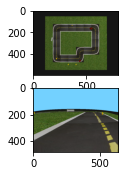

In [8]:
obs = env.reset()
import numpy as np
actions = np.ones(50, dtype=np.float32)
for t in range(1):
    obs, reward, done, _ = env.step([actions[t], actions[t]])
    topdown_img, front_img = env.render_topdown_and_front_img()
    fig = plt.figure()
    ax1 = fig.add_subplot(311)
    ax1.imshow(topdown_img)
    ax2 = fig.add_subplot(312)
    ax2.imshow(front_img)
    #ax3 = fig.add_subplot(313)
    #ax3.imshow(obs)#これを実行する場合はenv = ImgWrapper(env)をコメントアウト

DEBUG:gym-duckietown:[3.12976949 0.         1.19146557] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f432e6d9f10>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [3.21489961 0.         1.14393546]
DEBUG:gym-duckietown:l_pos: [3.12976949 0.         1.19146557]
DEBUG:gym-duckietown:r_pos: [3.30002974 0.         1.09640535]
DEBUG:gym-duckietown:f_pos: [3.15786348 0.         1.04177931]
DEBUG:gym-duckietown:[2.9581882  0.         1.24322864] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f432e6d9f10>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: Fa

(480, 640, 3)


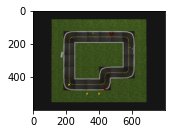

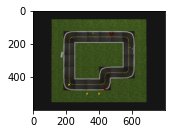

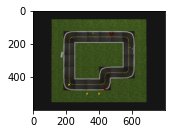

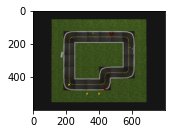

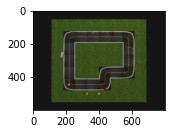

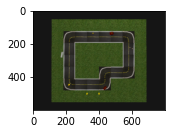

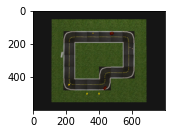

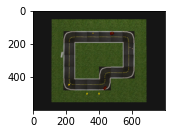

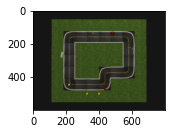

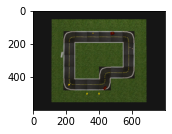

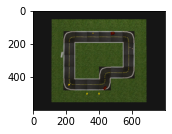

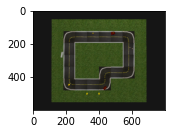

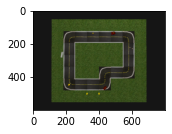

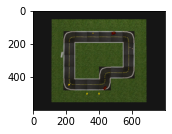

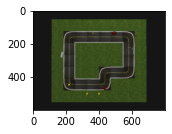

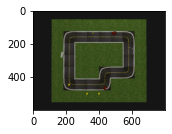

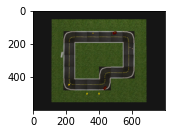

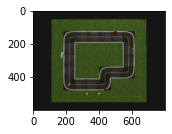

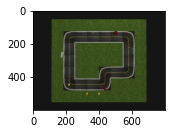

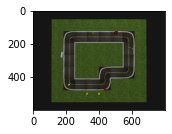

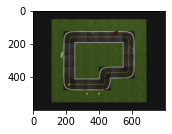

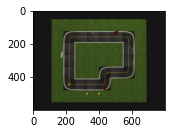

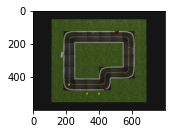

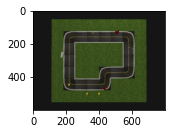

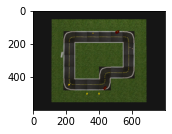

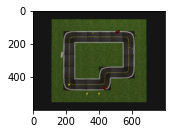

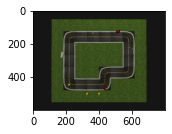

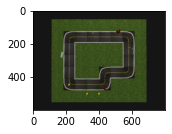

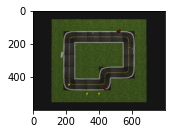

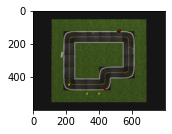

In [9]:
obs = env.reset()
frames = []
import numpy as np
actions = np.ones(50, dtype=np.float32)
for t in range(30):
    obs, reward, done, _ = env.step([actions[t], actions[t]])
    topdown_img, front_img = env.render_topdown_and_front_img()
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.imshow(topdown_img)
    #ax2 = fig.add_subplot(212)
    #ax2.imshow(front_img)
    frames.append(front_img)
print(np.shape(frames[0]))


In [17]:
# 結果を動画で観てみるための関数
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams["animation.convert_path"] = "C:\ProgramFiles\ImageMagick\magick.exe"

def display_video(frames):
    plt.figure(figsize=(8, 8), dpi=50)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        plt.title("Step %d" % (i))
    
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    #display(HTML(anim.to_jshtml(default_mode='once')))　#急に動かなくなった？
    anim.save('duckie_anim.gif', writer='pillow') 
    plt.close()

In [19]:
%cd '/content/drive/MyDrive/final-task/'

/content/drive/MyDrive/final-task


In [20]:
#display_video(frames)

In [13]:
import math
import numpy as np
from scipy.signal import lfilter
import gym
import gnwrapper
from cpprb import ReplayBuffer
import torch
from torch import nn
import copy
from collections import deque
from gym import wrappers
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical, Normal
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

from IPython import display
from JSAnimation.IPython_display import display_animation
from IPython.display import HTML

In [14]:
# actorのネットワーク
class ActorNetwork(nn.Module):
    def __init__(self, num_state, action_space, hidden_size=16):
        super(ActorNetwork, self).__init__()
        self.num_state = num_state
        self.act= 2 #action_space.shape[0]
        self.action_mean = torch.tensor(0.5*(action_space.high+action_space.low), dtype=torch.float)
        self.action_halfwidth = torch.tensor(0.5*(action_space.high-action_space.low), dtype=torch.float)
        self.fc1 = nn.Linear(num_state, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)#action_space.shape[0])

    def forward(self, s):
        h = F.elu(self.fc1(s))
        h = F.elu(self.fc2(h))
        a = self.action_mean + self.action_halfwidth*torch.tanh(self.fc3(h))
        return a

# criticのネットワーク（状態と行動を入力にしてQ値を出力）
class CriticNetwork(nn.Module):
    def __init__(self, num_state, action_space, hidden_size=16):
        super(CriticNetwork, self).__init__()
        self.action_mean = torch.tensor(0.5*(action_space.high+action_space.low), dtype=torch.float)
        self.action_halfwidth = torch.tensor(0.5*(action_space.high-action_space.low), dtype=torch.float)
        self.fc1 = nn.Linear(num_state+action_space.shape[0], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size,2) #action_space.shape[0])

    def forward(self, s, a):
        print(np.shape(a))
        print(np.shape(s))
        print(torch.cat([s,a],1))
        a = (a-self.action_mean)/self.action_halfwidth
        h = F.elu(self.fc1(torch.cat([s,a],1)))
        h = F.elu(self.fc2(h))
        q = self.fc3(h)
        return q

# リプレイバッファの定義
class ReplayBuffer:
    def __init__(self, memory_size):
        self.memory_size = memory_size
        self.memory = deque([], maxlen = memory_size)
    
    def append(self, transition):
        self.memory.append(transition)
    
    def sample(self, batch_size):
        batch_indexes = np.random.randint(0, len(self.memory), size=batch_size)
        states      = np.array([self.memory[index]['state'] for index in batch_indexes])
        next_states = np.array([self.memory[index]['next_state'] for index in batch_indexes])
        rewards     = np.array([self.memory[index]['reward'] for index in batch_indexes])
        actions     = np.array([self.memory[index]['action'] for index in batch_indexes])
        dones   = np.array([self.memory[index]['done'] for index in batch_indexes])
        return {'states': states, 'next_states': next_states, 'rewards': rewards, 'actions': actions, 'dones': dones}

In [15]:
class DdpgAgent:
    def __init__(self, observation_space, action_space, gamma=0.99, lr=1e-3, batch_size=32, memory_size=50000):
        self.num_state = observation_space.shape[2]
        self.num_action = 2 #action_space.shape[0]
        self.state_mean = 0.5*(observation_space.high + observation_space.low)
        self.state_halfwidth = 0.5*(observation_space.high - observation_space.low)
        self.gamma = gamma  # 割引率
        self.batch_size = batch_size
        self.actor = ActorNetwork(self.num_state, action_space)
        self.actor_target = copy.deepcopy(self.actor)  # actorのターゲットネットワーク
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=lr)
        self.critic = CriticNetwork(self.num_state, action_space)
        self.critic_target = copy.deepcopy(self.critic)  # criticのターゲットネットワーク
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=lr)
        self.replay_buffer = ReplayBuffer(memory_size)
        self.unti = observation_space

    
    # 連続値の状態を[-1,1]の範囲に正規化
    def normalize_state(self, state):

        state = (state-self.state_mean)/self.state_halfwidth
        return state
    
    # リプレイバッファからサンプルされたミニバッチをtensorに変換
    def batch_to_tensor(self, batch):
        states = torch.tensor([self.normalize_state(s) for s in batch["states"]], dtype=torch.float)
        actions = torch.tensor(batch["actions"], dtype=torch.float)
        next_states = torch.tensor([self.normalize_state(s) for s in batch["next_states"]], dtype=torch.float)
        rewards = torch.tensor(batch["rewards"], dtype=torch.float)
        return states, actions, next_states, rewards
    
    # actorとcriticを更新
    def update(self):
        batch = self.replay_buffer.sample(self.batch_size)
        states, actions, next_states, rewards = self.batch_to_tensor(batch)
        # criticの更新
        target_q = (rewards + self.gamma*self.critic_target(next_states, self.actor_target(next_states)).squeeze()).data
        q = self.critic(states, actions).squeeze()
        critic_loss = F.mse_loss(q, target_q)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        # actorの更新
        actor_loss = -self.critic(states, self.actor(states)).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        # ターゲットネットワークのパラメータを更新
        self.critic_target = copy.deepcopy(self.critic)
        self.actor_target = copy.deepcopy(self.actor)
    
    # Q値が最大の行動を選択
    def get_action(self, state):
        state_tensor = torch.tensor(self.normalize_state(state), dtype=torch.float)#.view(-1, self.num_state) 何故かself.num_state = ()になってるのでオミット
        action = self.actor(state_tensor)#.view(self.num_action)
        return action

In [22]:
# 各種設定
num_episode = 1000  # 学習エピソード数（学習に時間がかかるので短めにしています）
memory_size = 50000  # replay bufferの大きさ
initial_memory_size = 1000  # 最初に貯めるランダムな遷移の数
# ログ用の設定
episode_rewards = []
num_average_epidodes = 10

max_steps = 1000#env.spec.max_episode_steps  # エピソードの最大ステップ数

env = launch_env(map_name="loop_pedestrians")
print("Initialized environment")

# Wrappers
env = ResizeWrapper(env)
env = NormalizeWrapper(env)
env = ImgWrapper(env)  # to make the images from 160x120x3 into 3x160x120
env = ActionWrapper(env)
env = DtRewardWrapper(env)
print("Initialized Wrappers")
# 処理後の観測
state_dim = env.observation_space.shape
print(f"state_dim: {state_dim}")
# 行動次元（２つの車輪のトルク[-1,1]）
action_dim = env.action_space.shape[0]
print(f"action_dim: {action_dim}")
# 最大トルク
max_action = float(env.action_space.high[0])
print(f"max_action: {max_action}")

agent = DdpgAgent(env.observation_space, env.action_space, memory_size=memory_size)

# 最初にreplay bufferにランダムな行動をしたときのデータを入れる
state = env.reset()
for step in range(initial_memory_size):

    action = env.action_space.sample() # ランダムに行動を選択 
    next_state, reward, done, _ = env.step(action)
    transition = {
        'state': state,
        'next_state': next_state,
        'reward': reward,
        'action': action,
        'done': int(done)
    }
    agent.replay_buffer.append(transition)
    state = env.reset() if done else next_state
print('%d Data collected' % (initial_memory_size))

for episode in range(num_episode):
    state = env.reset()  # envからは3次元の連続値の観測が返ってくる
    episode_reward = 0
    for t in range(max_steps):
        action = agent.get_action(state).data.numpy()  #  行動を選択
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        transition = {
            'state': state,
            'next_state': next_state,
            'reward': reward,
            'action': action,
            'done': int(done)
        }
        agent.replay_buffer.append(transition)
        agent.update()  # actorとcriticを更新
        state = next_state
        if done:
            break
    episode_rewards.append(episode_reward)
    if episode % 20 == 0:
        print("Episode %d finished | Episode reward %f" % (episode, episode_reward))

# 累積報酬の移動平均を表示
moving_average = np.convolve(episode_rewards, np.ones(num_average_epidodes)/num_average_epidodes, mode='valid')
plt.plot(np.arange(len(moving_average)),moving_average)
plt.title('DDPG: average rewards in %d episodes' % num_average_epidodes)
plt.xlabel('episode')
plt.ylabel('rewards')
plt.show()

env.close()

INFO:gym-duckietown:Information about the graphics card:
 pyglet_version: 1.5.0
    information: dict[4]
                 │ vendor: VMware, Inc.
                 │ renderer: llvmpipe (LLVM 10.0.0, 256 bits)
                 │ version: 3.1 Mesa 20.0.8
                 │ shading-language-version: 1.40
  nvidia_around: True
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:loading map file "/content/drive/MyDrive/final-task/colab_modules/duckietown_world/data/gd1/maps/loop_pedestrians.yaml"
INFO:gym-duckietown:done
DEBUG:gym-duckietown:[4.14228125 0.         2.65556531] corresponds to tile at (7, 4) which is not drivable: {'coords': (7, 4), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f421e6d1f10>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown

Initialized environment
Initialized Wrappers
state_dim: (3, 120, 160)
action_dim: 2
max_action: 1.0


DEBUG:gym-duckietown:l_pos: [3.34795215 0.         1.20410005]
DEBUG:gym-duckietown:r_pos: [3.50914705 0.         1.09436763]
DEBUG:gym-duckietown:f_pos: [3.36271015 0.         1.0525169 ]
DEBUG:gym-duckietown:[3.28332965 0.         1.23265022] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f421e6e0310>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [3.34735695 0.         1.15911958]
DEBUG:gym-duckietown:l_pos: [3.28332965 0.         1.23265022]
DEBUG:gym-duckietown:r_pos: [3.41138424 0.         1.08558894]
DEBUG:gym-duckietown:f_pos: [3.25912018 0.         1.08228683]
DEBUG:gym-duckietown:[3.15539593 0.         0.57763513] corresponds to tile at (5, 0) which is not drivable: {'coords': (5, 0), 'kind': 'floor', 'angle': 1, 'drivab

1000 Data collected


DEBUG:gym-duckietown:l_pos: [3.12976949 0.         1.19146557]
DEBUG:gym-duckietown:r_pos: [3.30002974 0.         1.09640535]
DEBUG:gym-duckietown:f_pos: [3.15786348 0.         1.04177931]
DEBUG:gym-duckietown:[2.9581882  0.         1.24322864] corresponds to tile at (5, 2) which is not drivable: {'coords': (5, 2), 'kind': 'floor', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x7f421e6d5850>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [2.94879996 0.         1.12660591]
DEBUG:gym-duckietown:l_pos: [3.04598557 0.         1.11878237]
DEBUG:gym-duckietown:r_pos: [2.85161435 0.         1.13442944]
DEBUG:gym-duckietown:f_pos: [2.9581882  0.         1.24322864]
DEBUG:gym-duckietown:[3.05764663 0.         0.57629387] corresponds to tile at (5, 0) which is not drivable: {'coords': (5, 0), 'kind': 'floor', 'angle': 1, 'drivab

torch.Size([32, 3, 120, 2])
torch.Size([32, 3, 120, 160])


RuntimeError: ignored

In [ ]:
agent = DdpgAgent(env.observation_space, env.action_space, memory_size=memory_size)
print(f"env.:{env.observation_space}")
#state = env.reset()

In [ ]:
np.shape(state)

In [ ]:
arr = np.random.rand(120,160,3)

In [ ]:
state = arr

In [ ]:
state_tensor = torch.tensor(state, dtype=torch.float)
print(np.shape(state_tensor))

In [ ]:
action = agent.get_action(arr).data.numpy()

In [ ]:
agent.get_action(state)

In [ ]:
env.observation_space

In [ ]:
plt.imshow(state)
print(np.shape(state))
action = agent.get_action(state)

In [ ]:
import gnwrapper
# 可視化用の環境。JupyterNotebookで可視化するためのラッパーをかましています
monitor_env = gnwrapper.Monitor(gym.make("Pendulum-v0"), size=(400, 300), directory='.', force=True,
                                video_callable=lambda ep: True)

episode_max_steps = 200

for episode_idx in range(3):
    obs = monitor_env.reset()
    total_rew = 0.
    for _ in range(episode_max_steps):
        act = agent.get_action(state).detach().numpy()
        next_obs, rew, done, _ = monitor_env.step(act)
        total_rew += rew
        if done:
            break
        obs = next_obs
    print("iter={0: 3d} total reward: {1: 4.4f}".format(episode_idx, total_rew))

monitor_env.display(reset=True)